In [1]:
import pandas as pd
import numpy as np
import random
from glob import glob
import seaborn as sns
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
sns.set_theme('poster')
sns.axes_style({
    'axes.facecolor': 'white',
    'axes.edgecolor': 'black',
    'axes.grid': False,
    'axes.axisbelow': 'line',
    'axes.labelcolor': 'black',
    'figure.facecolor': 'white',
    'grid.color': '#b0b0b0',
    'grid.linestyle': '-',
    'text.color': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    'patch.edgecolor': 'black',
    'patch.force_edgecolor': False,
    'image.cmap': 'viridis',
    'font.family': ['sans-serif'],
    'font.sans-serif': ['DejaVu Sans',
     'Bitstream Vera Sans',
     'Computer Modern Sans Serif',
     'Lucida Grande',
     'Verdana',
     'Geneva',
     'Lucid',
     'Arial',
     'Helvetica',
     'Avant Garde',
     'sans-serif'],
    'xtick.bottom': True,
    'xtick.top': False,
    'ytick.left': True,
    'ytick.right': False,
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.right': True,
    'axes.spines.top': True
    })

{'axes.facecolor': 'white',
 'axes.edgecolor': 'black',
 'axes.grid': False,
 'axes.axisbelow': 'line',
 'axes.labelcolor': 'black',
 'figure.facecolor': 'white',
 'grid.color': '#b0b0b0',
 'grid.linestyle': '-',
 'text.color': 'black',
 'xtick.color': 'black',
 'ytick.color': 'black',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'patch.edgecolor': 'black',
 'patch.force_edgecolor': False,
 'image.cmap': 'viridis',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['DejaVu Sans',
  'Bitstream Vera Sans',
  'Computer Modern Sans Serif',
  'Lucida Grande',
  'Verdana',
  'Geneva',
  'Lucid',
  'Arial',
  'Helvetica',
  'Avant Garde',
  'sans-serif'],
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

In [3]:
file_paths = {
    '0-50 GeV' : sorted(glob('/scratch/rhillman/data/photonGun_E_0_50/BIB/*')),
    '50-250 GeV' : sorted(glob('/scratch/rhillman/data/photonGun_E_50_250/BIB/*')),
    '250-1000 GeV' : sorted(glob('/scratch/rhillman/data/photonGun_E_250_1000/BIB/*')),
    '1000-5000 GeV' : sorted(glob('/scratch/rhillman/data/photonGun_E_1000_5000/BIB/*'))
}

def get_events(n: int, energy: str):
    dataframes = []
    for i in range(n):
        file = file_paths[energy][i]
        df = pd.read_parquet(file)
        dataframes.append(df)
    return dataframes

def aggregate(df):
    grouped_df = df.groupby(['cell_id_0', 'cell_id_1']).agg({
    'x_mm' : 'mean',
    'y_mm' : 'mean',
    'z_mm' : 'mean',
    'E_GeV': 'sum',
    't_ns': 'first',
    'layer': 'first',
    'SIGNAL': 'any'  # True if at least one hit is a signal
}).reset_index()
    return grouped_df

def get_events_aggregated(n: int, energy:str):
    events = get_events(n, energy)
    events = [aggregate(event) for event in events]
    return events

In [4]:
plt.rcParams['lines.antialiased'] = False
plt.rcParams['figure.dpi'] = 300

plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#EAEAF2',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': True,
          'axes.grid.axis': 'bo

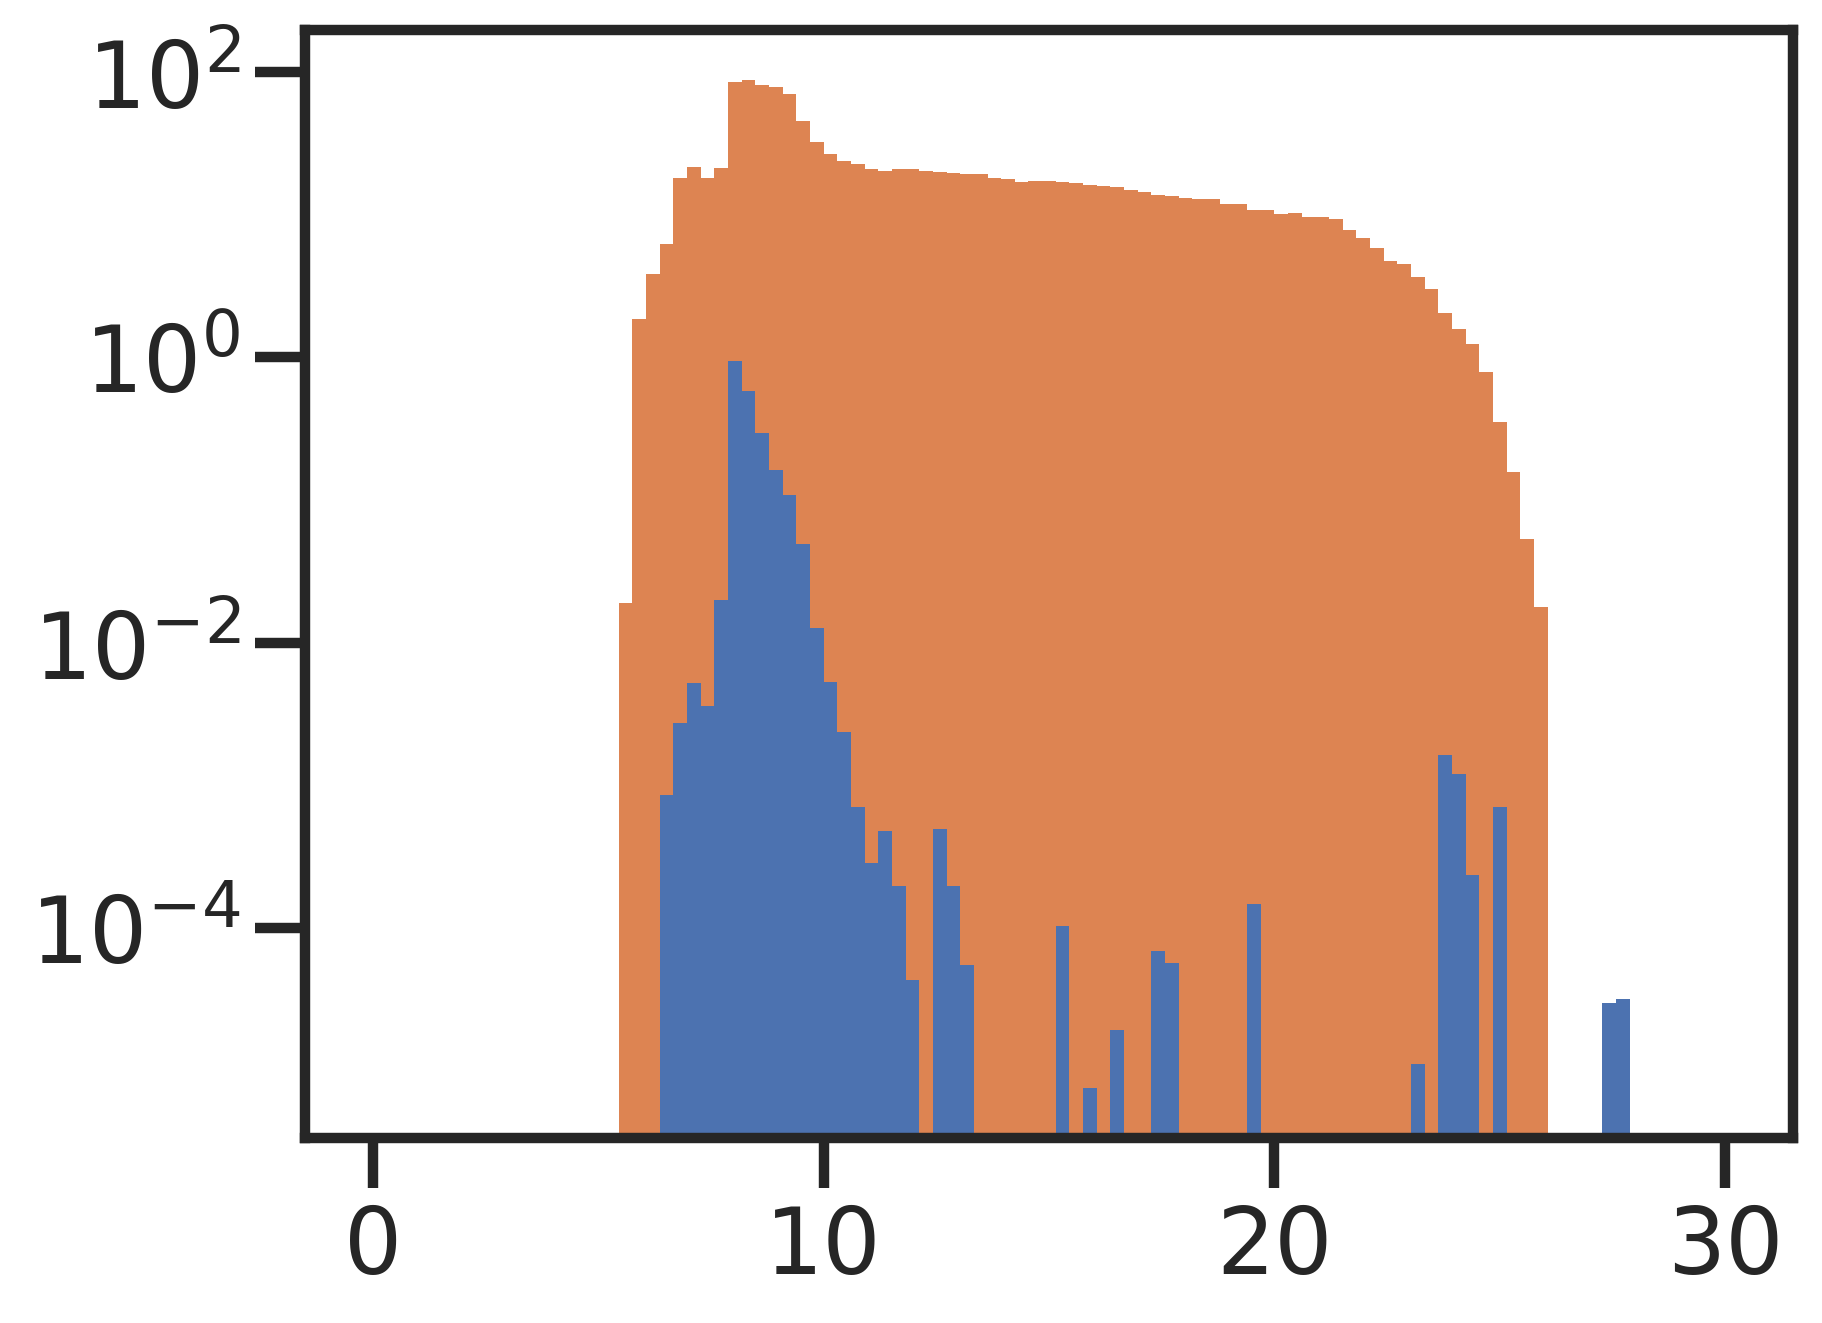

In [10]:
sns.set_style('ticks')

df = pd.read_parquet(random.choice(file_paths['250-1000 GeV']))

# bins = np.logspace(np.log10(df['t_ns'].min()),
#                    np.log10(df['t_ns'].max()),
#                    100
#                    )

bins = np.linspace(0, 30, 100)
plt.hist(
    [df[df['SIGNAL'] == True]['t_ns'],
     df[df['SIGNAL'] == False]['t_ns']
     ],
    weights=[df[df['SIGNAL'] == True]['E_GeV'],
             df[df['SIGNAL'] == False]['E_GeV']
             ],
    stacked=True,
    bins=bins,
    linewidth=0
    )

# plt.xscale('log')
plt.yscale('log')

In [6]:
def energy_threshold(df, threshold):
    return df[df['E_GeV'] > threshold]

def time_filter(df, range: float) -> pd.DataFrame:
    # find signal peak time
    # cut with some range around this value
    # 
    return something

In [7]:
def get_mean_signal_position(df):
    signal_rows = df[df['SIGNAL'] == True]
    mean_x = signal_rows['x_mm'].mean()
    mean_y = signal_rows['y_mm'].mean()
    mean_z = signal_rows['z_mm'].mean()
    return mean_x, mean_y, mean_z

def get_cone(df, direction, spread_radians):
    direction = direction / np.linalg.norm(direction)
    dot_product = df[['x_mm', 'y_mm', 'z_mm']].values.dot(direction)
    magnitude = np.linalg.norm(df[['x_mm', 'y_mm', 'z_mm']].values, axis=1)
    cosine = dot_product / magnitude
    cosine_spread = np.cos(spread_radians)
    filtered_df = df[cosine >= cosine_spread]
    return filtered_df

def calculate_energies_per_threshold(event, threshold=0.01):
    # Calculate target energy: get cone and then sum all energies with "SIGNAL" == True in that cone.
    cone = get_cone(event, get_mean_signal_position(event), 0.1)
    signal_cone = cone[cone['SIGNAL'] == True]
    
    if signal_cone.empty == False:
        target_energy = signal_cone['E_GeV'].sum()
    
    # Filter and calculate reconstructed energy
    filtered_cone = get_minimum_energy_threshold(cone, threshold)
    reco_energy = filtered_cone['E_GeV'].sum()
    
    # Calculate fractional difference
    response = reco_energy  / target_energy
    
    return target_energy, reco_energy, response